In [1]:
import gspread as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
sa = gs.service_account(filename="enhanced-victor-363219-68e4353f5f23.json")
sheet = sa.open("Untitled form (Responses)")
work_sheet = sheet.worksheet("Form Responses 1")

In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [5]:
file1 = open('arrayCheckPoint.txt', 'r')
Lines = file1.readlines()
arrayCheck = []
for line in Lines:
    strList = line.strip().split(',')
    intList = [int(x) for x in strList if (x != '') & (x != '0')]
    intList.sort()
    arrayCheck.append(intList)
#arrayCheck

In [6]:
# Using readlines()
file2 = open('coin.txt', 'r')
Lines = file2.readlines()
coin = []
for line in Lines:
    strList = line.strip().split(',')
    intList = [int(x) for x in strList if (x != '') & (x != '0')]
    intList.sort()
    coin.append(intList)
#coin

In [7]:
df = pd.DataFrame(work_sheet.get_all_records())
df['arrive check point'] = arrayCheck
df['array get coin'] = coin
df['time elapse'] = pd.to_numeric(df['time elapse'])
df['a score'] = pd.to_numeric(df['a score'])
df['b score'] = pd.to_numeric(df['b score'])
df['total score'] = df['a score'] + df['b score']
df=df[df['time elapse'] <= 600]
df1 = df.dropna()
df1=df1.iloc[712:]
df1.head()

,Timestamp,sessionID,a score,b score,time elapse,"who caused death, 0 for left player, 1 for right, -1 none",death reason,level,"true for pass level, false for died",arrive check point time array,coin get time array,"inertia world for true, normal for false",arrive check point,array get coin,total score
737,10/18/2022 16:31:52,638017074808700032.0,3.0,3.0,25.0,1,Fall,Level0,FALSE,0,4713111620000000,FALSE,[],"[4, 7, 11, 13, 16, 20]",6.0
738,10/18/2022 16:32:11,638017074808700032.0,3.0,3.0,15.0,1,Fall,Level1,FALSE,0,29311614000000,FALSE,[],"[2, 3, 6, 9, 11, 14]",6.0
739,10/18/2022 16:32:14,638017074808700032.0,0.0,0.0,2.0,1,Touch different Color,Level1,FALSE,0,0,FALSE,[],[],0.0
740,10/18/2022 16:45:27,638017083046960000.0,0.0,1.0,22.0,1,Touch different Color,Level1,FALSE,0,200000000000,FALSE,[],[20],1.0
741,10/18/2022 16:46:22,638017083315590016.0,3.0,3.0,44.0,-1,,Level0,TRUE,0,171234344242000000,FALSE,[],"[12, 17, 34, 34, 42, 42]",6.0


In [8]:
def GetCoin(row):
    coins = row['array get coin']
    coinCnt=[]
    cnt=1
    for coin in coins:
        coinCnt.append(cnt)
        if (coin > 0):
            cnt+=1
    return coinCnt
df1['array coin']=df1.apply(lambda row: GetCoin(row), axis=1)
df1.head()

,Timestamp,sessionID,a score,b score,time elapse,"who caused death, 0 for left player, 1 for right, -1 none",death reason,level,"true for pass level, false for died",arrive check point time array,coin get time array,"inertia world for true, normal for false",arrive check point,array get coin,total score,array coin
737,10/18/2022 16:31:52,638017074808700032.0,3.0,3.0,25.0,1,Fall,Level0,FALSE,0,4713111620000000,FALSE,[],"[4, 7, 11, 13, 16, 20]",6.0,"[1, 2, 3, 4, 5, 6]"
738,10/18/2022 16:32:11,638017074808700032.0,3.0,3.0,15.0,1,Fall,Level1,FALSE,0,29311614000000,FALSE,[],"[2, 3, 6, 9, 11, 14]",6.0,"[1, 2, 3, 4, 5, 6]"
739,10/18/2022 16:32:14,638017074808700032.0,0.0,0.0,2.0,1,Touch different Color,Level1,FALSE,0,0,FALSE,[],[],0.0,[]
740,10/18/2022 16:45:27,638017083046960000.0,0.0,1.0,22.0,1,Touch different Color,Level1,FALSE,0,200000000000,FALSE,[],[20],1.0,[1]
741,10/18/2022 16:46:22,638017083315590016.0,3.0,3.0,44.0,-1,,Level0,TRUE,0,171234344242000000,FALSE,[],"[12, 17, 34, 34, 42, 42]",6.0,"[1, 2, 3, 4, 5, 6]"


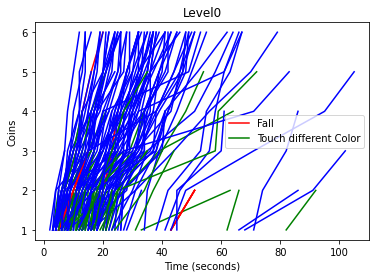

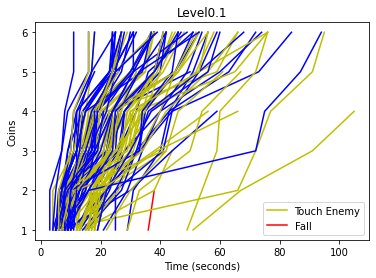

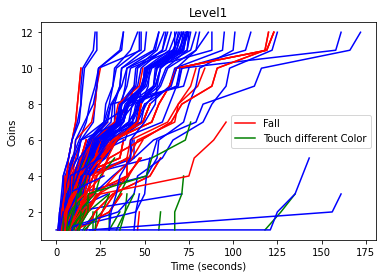

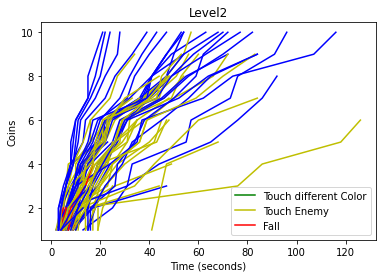

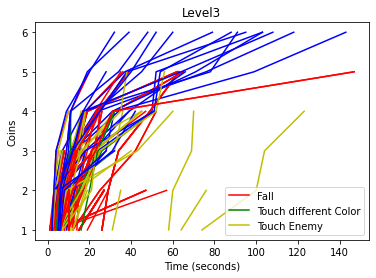

In [9]:
thisdict={
    "Fall": "r",
    "Touch different Color": "g",
    "": "b",
    "Touch Enemy": "y"
}
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))
def plot(row):
    x = row['array get coin']
    y = row['array coin']
    death = row['death reason']
    ax.plot(x, y, thisdict[death], label=death)
for j in (['Level0', 'Level0.1', 'Level1', 'Level2', 'Level3']):
    level=df1[df1['level']==j]
    fig, ax = plt.subplots()
    level.apply(lambda row: plot(row), axis=1)
    legend_without_duplicate_labels(ax)
    plt.title(j)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Coins")
    plt.show()

In [10]:
time = df1.groupby(['level', 'sessionID'])['time elapse'].apply(list)
score = df1.groupby(['level', 'sessionID'])['total score'].apply(list)
death = df1.groupby(['level', 'sessionID'])['death reason'].apply(list)
checktime=df1[(df1['arrive check point time array']!='') & (df1['arrive check point time array']!=0)]
checktime['arrive check point time array']= checktime['arrive check point time array'].values.astype(str)
checktime['arrive check point time array']

C:\Users\lucyg\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


744     142100000000
749      37000000000
751     141700000000
754     173100000000
762      46000000000
            ...     
4355      6900000000
4356     21000000000
4357    610024000000
4358    416036000000
4359    829053000000
Name: arrive check point time array, Length: 515, dtype: object

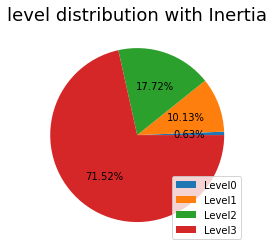

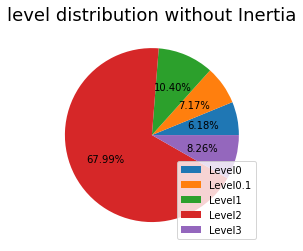

In [11]:
truefalse=["TRUE", "FALSE"]
withinertia=['with Inertia', 'without Inertia']
for i in range(2):
        level=df1[df1['level']!='']
        level=level[level['inertia world for true, normal for false']==truefalse[i]]
        df2 = level.groupby(['level']).size()
        plt.title("level distribution "+withinertia[i],fontsize=18)
        patches, text1, text2 = plt.pie(df2, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df2.sum()))
        plt.legend(patches, df2.index, loc="lower right")
        plt.show()

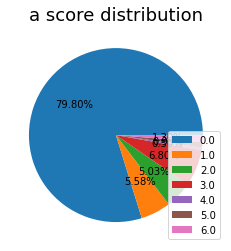

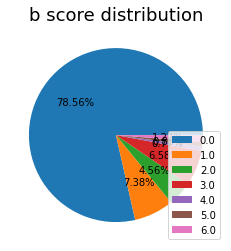

In [12]:
for i in (['a score', 'b score']):
    #level = df1[df1['level']==j]
    df2 = df1.groupby([i]).size()
    plt.title(i + " distribution",fontsize=18)
    patches, text1, text2 = plt.pie(df2, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df2.sum()))
    plt.legend(patches, df2.index, loc="lower right")
    plt.show()

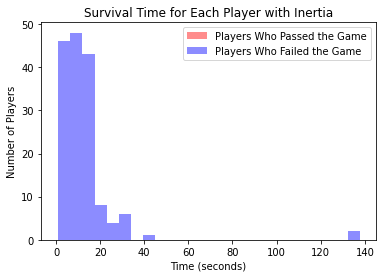

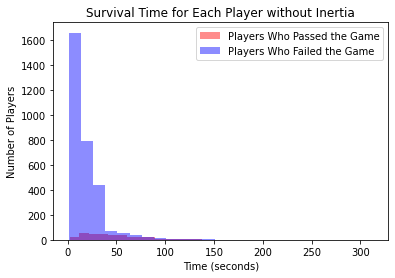

In [13]:
# plotting two histograms on the same axis
truefalse=["TRUE", "FALSE"]
withinertia=['with Inertia', 'without Inertia'] 
for i in range(2):
        passed=df1[df1['true for pass level, false for died'] == 'TRUE']
        passed=passed[passed['inertia world for true, normal for false']==truefalse[i]]
        notPassed=df1[df1['true for pass level, false for died'] == 'FALSE']
        notPassed=notPassed[notPassed['inertia world for true, normal for false']==truefalse[i]]
        plt.hist(passed['time elapse'], bins=25, alpha=0.45, color='red')
        plt.hist(notPassed['time elapse'], bins=25, alpha=0.45, color='blue')

        plt.title("Survival Time for Each Player " + withinertia[i])

        plt.legend(['Players Who Passed the Game', 
                    'Players Who Failed the Game'])
        plt.xlabel("Time (seconds)")
        plt.ylabel("Number of Players")  
        plt.show()

,Fall,level,Touch different Color,Touch Enemy
0,1.0,Level0,NaN,NaN
1,NaN,Level0.1,NaN,NaN
2,4.0,Level1,12.0,NaN
3,26.0,Level2,2.0,NaN
4,106.0,Level3,4.0,3.0


,Fall,Touch different Color,level,Touch Enemy
0,8,93.0,Level0,NaN
1,58,NaN,Level0.1,78.0
2,117,180.0,Level1,NaN
3,2251,18.0,Level2,45.0
4,200,19.0,Level3,46.0


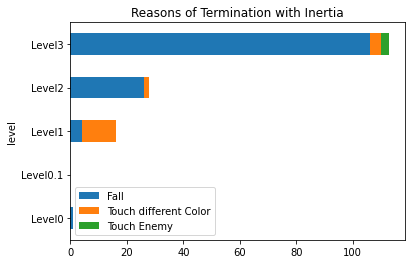

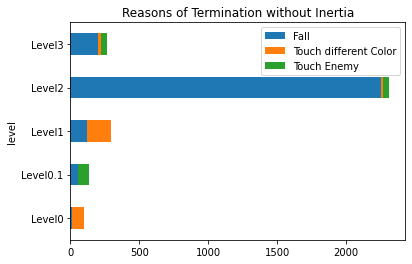

In [14]:
truefalse=["TRUE", "FALSE"]
withinertia=['with Inertia', 'without Inertia']
for i in range(2):
    inertia=df1[df1['inertia world for true, normal for false']==truefalse[i]]
    data=[]
    for j in (['Level0', 'Level0.1', 'Level1', 'Level2', 'Level3']):
        level = inertia[inertia['level']==j]
        df3 = level[level['death reason'] != '']
        df4 = df3.groupby(['death reason']).size()
        dictionary=df4.to_dict()
        dictionary['level']=j
        data.append(dictionary)
    deathReason = pd.DataFrame(data)
    deathReason.plot(
        x = 'level',
        kind = 'barh',
        stacked = True,
        title = 'Reasons of Termination ' + withinertia[i], #stacked bar chart
        mark_right = True)
    deathReason.set_index('level')
    display(deathReason)

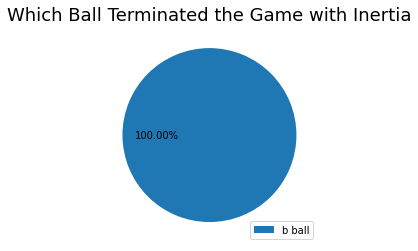

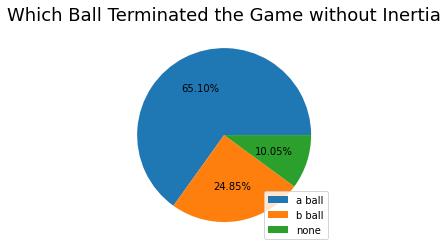

In [15]:
for i in range(2):
    whoCausedDeath = df1['who caused death, 0 for left player, 1 for right, -1 none'].map({1: 'b ball', 0: 'a ball', -1: 'none'})
    df6=df1
    df6["who caused death"] = whoCausedDeath
    df6=df6[df6['inertia world for true, normal for false']==truefalse[i]]
    df5 = df6.groupby(['who caused death']).size()
    plt.title("Which Ball Terminated the Game "+ withinertia[i],fontsize=18)
    patches, text1, text2 = plt.pie(df5, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df5.sum()))
    plt.legend(patches, df5.index, loc="lower right")
    plt.show()

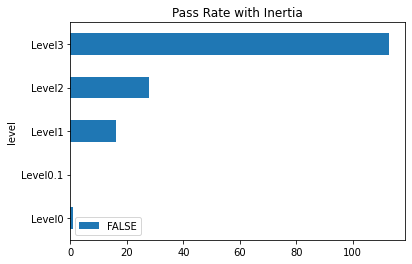

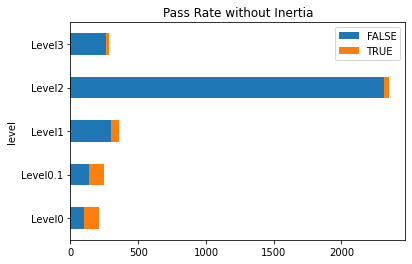

In [16]:
for i in range(2):
    inertia=df1[df1['inertia world for true, normal for false']==truefalse[i]]
    data=[]
    for j in (['Level0', 'Level0.1', 'Level1', 'Level2', 'Level3']):
        level=inertia[inertia['level']==j]
        df2 = level.groupby(['true for pass level, false for died']).size()
        dictionary=df2.to_dict()
        dictionary['level']=j
        data.append(dictionary)

    passRate = pd.DataFrame(data)
    passRate.plot(
        x = 'level',
        kind = 'barh',
        stacked = True,
        title = 'Pass Rate ' + withinertia[i], #stacked bar chart
        mark_right = True)

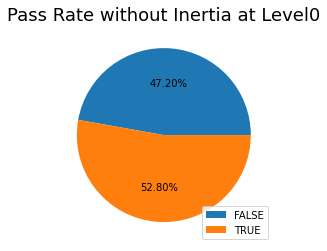

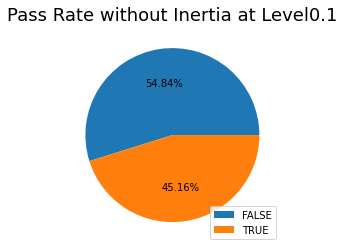

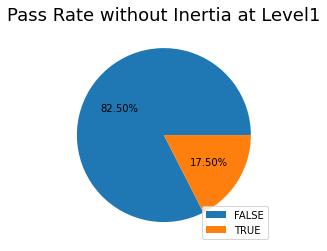

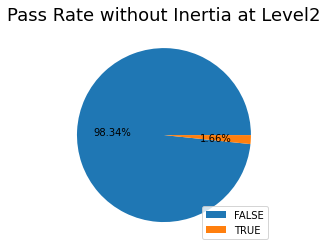

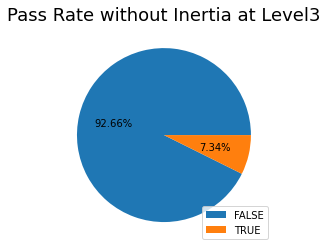

In [17]:
inertia=df1[df1['inertia world for true, normal for false']=='FALSE']
for j in (['Level0', 'Level0.1', 'Level1', 'Level2', 'Level3']):
    level=inertia[inertia['level']==j]
    df2 = level.groupby(['true for pass level, false for died']).size()
    plt.title("Pass Rate without Inertia at " + j,fontsize=18)
    patches, text1, text2 = plt.pie(df2, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df2.sum()))
    plt.legend(patches, df2.index, loc="lower right")
    plt.show()

In [18]:
levelsPlayed = pd.DataFrame(df1.groupby('sessionID')['level'].apply(lambda x: list(np.unique(x))))
levelsPlayed.reset_index(inplace=True)
for i in ['Level0', 'Level0.1', 'Level1', 'Level2', 'Level3']:
    levelsPlayed[i]=levelsPlayed['level'].apply(lambda x: 1 if i in x else 0)
levelsCnt=pd.DataFrame(levelsPlayed.groupby(['Level0.1', 'Level0', 'Level1', 'Level2', 'Level3']).size())
levelsCnt.reset_index(inplace=True)
levelsCnt = levelsCnt.rename(columns = {0:'count'})
levelsCnt=levelsCnt.sort_values(by='count', ascending=False)  
levelsCnt

,Level0.1,Level0,Level1,Level2,Level3,count
13,1,0,0,0,0,55
3,0,0,1,0,0,47
7,0,1,0,0,0,41
16,1,1,0,0,0,29
1,0,0,0,1,0,26
23,1,1,1,1,1,22
0,0,0,0,0,1,19
22,1,1,1,1,0,11
10,0,1,1,0,0,11
4,0,0,1,0,1,11
